# Imports

In [87]:
import nltk
from   nltk.corpus import stopwords
from   nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import os

import pandas as pd
import regex  as re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB


In [47]:
tt = pd.read_csv('./archive/tweets_data.csv')

In [48]:
tt.head()

,Unnamed: 0,id,label,tweet
0,0,1,0,@user when a father is dysfunctional and is s...
1,1,2,0,@user @user thanks for #lyft credit i can't us...
2,2,3,0,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation


Labels: <br>
    0 = Positive sentiment <br>
    1 = Negative sentiment

# Remoção de  colunas não utilizadas

In [49]:
tt.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [50]:
tt.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


### Lower Casing

In [51]:
tt['tweet'] = tt.tweet.str.lower()

### Newlines

In [52]:
def replace_newline(word):
    return word.replace('\n','')

In [53]:
tt['tweet'] = tt.tweet.apply(replace_newline)

### Remoção de mentions e hashtags

In [54]:
def remove_mentions(sentence):
    no_mention = re.sub(r"@\S+", "", sentence)
    return no_mention

def remove_hashtags(sentence):
    no_hashtag = re.sub(r"#", "", sentence)
    return no_hashtag

In [55]:
tt['tweet'] = tt.tweet.apply(remove_mentions)
tt['tweet'] = tt.tweet.apply(remove_hashtags)

In [56]:
tt.tweet

0          when a father is dysfunctional and is so sel...
1          thanks for lyft credit i can't use cause the...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                    factsguide: society now    motivation
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     sikh temple vandalised in in calgary, wso con...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

### Remoção de pontuação 

In [57]:
def remove_punctuation(sentence):
    punctuation = ['.','?',',','!', ':', ';','>','<','/','*','+','&','(',')', '"',"'"]
    translate_table = str.maketrans(dict.fromkeys(punctuation, ''))
    no_punctuation = sentence.translate(translate_table)
    
    return no_punctuation

In [58]:
tt['tweet'] = tt.tweet.apply(remove_punctuation)

### Remoção de Stopwords

In [59]:
stopwordz = stopwords.words('english')

In [60]:
def remove_stopwords(sentence):
    sentence = sentence.split()
    list_sentence = [word for word in sentence if word not in stopwordz]
    return ' '.join(list_sentence)

In [61]:
tt['tweet'] = tt.tweet.apply(remove_stopwords)

In [62]:
tt.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love u take u time urð± ðððð...
4,0,factsguide society motivation


### Remover números

In [63]:
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

In [64]:
tt['tweet'] = tt.tweet.apply(remove_number)

### Remove Hyperlinks

In [65]:
def remove_hyperlink(sentence):       
    return re.sub(r"http\S+", "", sentence)

In [66]:
tt['tweet'] = tt.tweet.apply(remove_hyperlink)

In [67]:
def remove_special_chars(sentence):
    return re.sub(r'[^a-zA-Z0-9]', ' ', sentence)

In [68]:
tt['tweet'] = tt.tweet.apply(remove_special_chars)

In [69]:
tt.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love u take u time ur ...
4,0,factsguide society motivation


### Remoção whitespaces

In [70]:
tt['tweet'] = tt.tweet.str.strip()

### Tokenizing 

In [71]:
tt['tweet'] = tt['tweet'].apply(word_tokenize)

In [72]:
tt.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur]"
4,0,"[factsguide, society, motivation]"


### Stemming 

In [73]:
def stem_words(sentence):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in sentence])

In [74]:
tt['tweet'] = tt.tweet.apply(stem_words)

In [75]:
tt.head()

,label,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit cant use caus dont offer whe...
2,0,bihday majesti
3,0,model love u take u time ur
4,0,factsguid societi motiv


## Feture Engineering

In [131]:
X_train, X_test, y_train, y_test = train_test_split(tt.tweet, tt.label, test_size = 0.2)                                    

## Embedding

In [133]:
bow = CountVectorizer(max_features = 3000, min_df=2, max_df = 0.9)

In [134]:
X_train = bow.fit_transform(X_train).toarray()

In [102]:
tfidf = TfidfVectorizer(max_features = 3000, min_df = 3)

In [103]:
embedded_input = tfidf.fit_transform(X_train).toarray()

In [93]:
embedded_input.shape

(31962, 3000)

In [135]:
model = MultinomialNB()

In [136]:
model.fit(X_train, y_train)

MultinomialNB()

In [137]:
cross_val_score(model, X_train, y_train, cv = 3, scoring = 'f1')

array([0.59570957, 0.61926606, 0.63354037])

In [139]:
X_test = bow.fit_transform(X_test).toarray()

/home/gabriel/anaconda3/envs/nlp-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


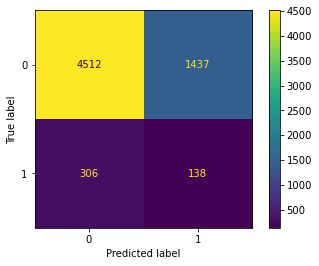

In [140]:
plot_confusion_matrix(model, X_test, y_test)